# 1. Setup and Load Data

### 1.1 Install Dependencies and Setup

In [1]:
# pip install tensorflow

In [2]:
# !pip install opencv-python matplotlib

In [3]:
# !pip list

In [4]:
import tensorflow as tf
import os

In [5]:
# Avoid OOM errors by setting GPU Memory Consumption Growth

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

### 1.2 Remove dodgy images

In [6]:
import cv2
import imghdr

/var/folders/rg/lp_l01pj5c1c2s22v2fm03bc0000gn/T/ipykernel_92683/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [7]:
data_dr = "data"
for item in os.listdir(data_dr):
    if item == '.DS_Store':
        os.remove(os.path.join(data_dr, item))  # Remove the .DS_Store file
    else:
        # Process your files/directories as usual
        print(f"Processing {item}")

Processing happy
Processing sad


In [8]:
os.listdir(data_dr)

['happy', 'sad']

In [9]:
os.listdir(os.path.join(data_dr, "happy"))

['05-12-21-happy-people.jpg',
 'Happy.jpg',
 'GettyImages-871518740-1024x707.jpg',
 '7-principles-of-successful-and-happy-people.png',
 '170404-happy-workers-feature.jpg',
 'goup-happy-people-group-jumping-isolated-white-background-35582232.jpg',
 'o-HAPPY-facebook.jpg',
 'download (7).jpeg',
 'young-and-happy-people-vector-15114154.jpg',
 'shpl_s1_digitalonesheet_happyfaces_27x40_pre_final_en-us_cps_custom-c5a0cc5b4b5b0d8a651ee346a042970c45cf3475.jpg',
 'file-20230208-27-3jttof.jpg',
 'Happiness-Habits-10-Things-Happy-People-Do-Before-Bed-800x450.jpg',
 'habits-of-happy-people-jpg.jpg',
 'images.jpeg',
 'p074953m.jpg',
 'tiny-happy-people-logo.png',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA@@._V1_.jpg',
 '1920px-face-smile.svg_.png',
 'happy-people (1).png',
 'gdfVVm_MyCRtqpvdkt8vtSB1n_oz_CpwCq6vNMpj0S8.jpg',
 '439d94f1ea3c8d6343f2832750cf12e6.jpg',
 'happiest.jpg',
 'friends-happy-190821-1490x838.jpg',
 'happiness.jpg',
 'business-people-succesful-celebrating-group-successful-

In [10]:
image_exts = ["jpeg", "jpg", "bmp", "png"]

In [11]:
for image_class in os.listdir(data_dr):
    for image in os.listdir(os.path.join(data_dr, image_class)):
        image_path = os.path.join(data_dr, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

libpng warning: iCCP: known incorrect sRGB profile


### 1.3 Load Data

In [12]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 161 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
# Get batch from iterator

batch = data_iterator.next()

2023-12-28 15:06:07.352792: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [17]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

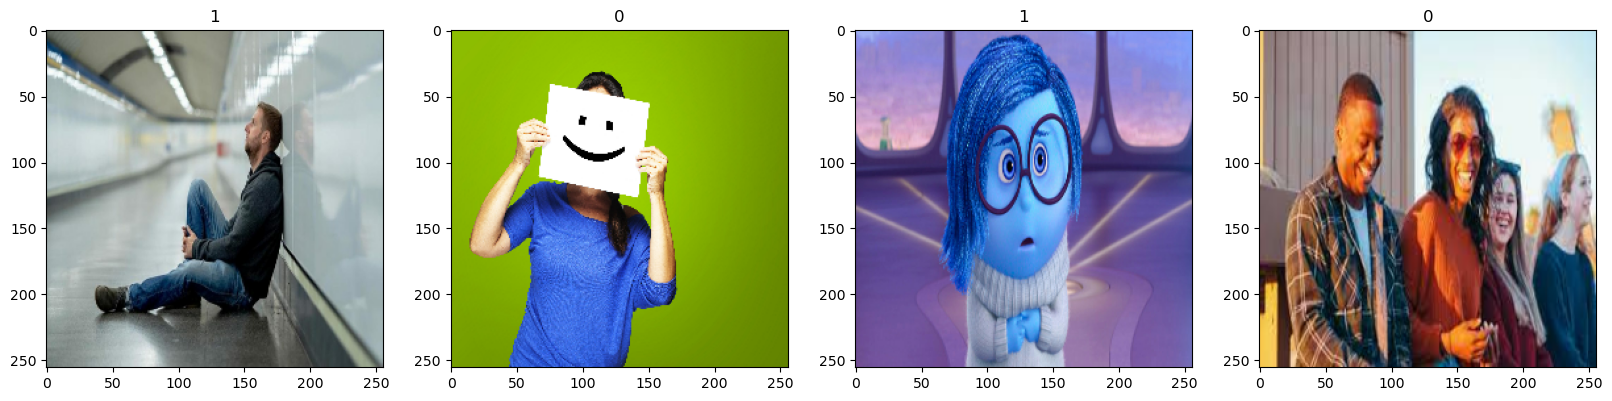

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [19]:
# Get another batch from iterator

batch = data_iterator.next()

In [20]:
# Class 1 = SAD People
# Class 0 = HAPPY People
batch[1]

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0], dtype=int32)

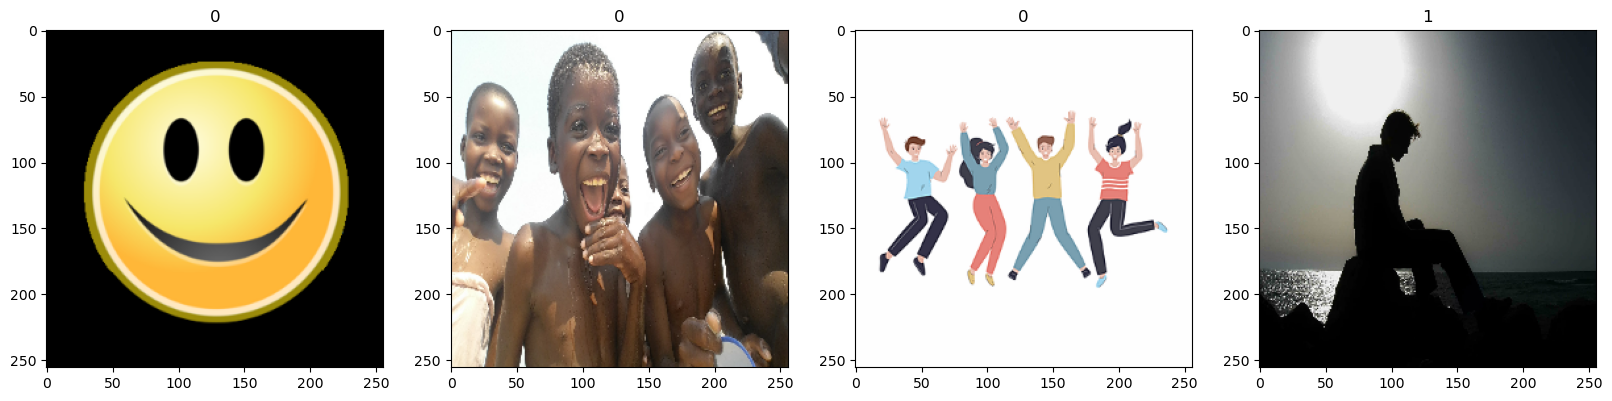

In [21]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2. Preprocess Data

### 2.1 Scale Data

In [22]:
data = data.map(lambda x, y: (x/255, y))

In [23]:
batch = data.as_numpy_iterator().next()

2023-12-28 15:06:09.322196: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [25]:
batch[0].max()

1.0

### 2.1 Split Data

In [26]:
len(data)

6

In [27]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.3)
test_size = int(len(data)*.2)

In [28]:
# checking the size allocated are correct when added up
train_size+val_size+test_size

6

In [29]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [30]:
len(test)

1

In [31]:
len(train)

4

In [32]:
len(val)

1

# Deep Model

### 3.1 Build Deep Learning Model

In [33]:
# importing the necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [34]:
# create and initialise the model
model = Sequential()

In [35]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [36]:
# compile the model 
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

### 3.2 Train

In [38]:
logdir='logs'

In [39]:
tensorboard_callbacks = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [40]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callbacks])

Epoch 1/20


2023-12-28 15:06:50.295754: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.8248 - accuracy: 0.5469

2023-12-28 15:06:52.089490: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 549ms/step - loss: 0.8248 - accuracy: 0.5469 - val_loss: 0.7902 - val_accuracy: 0.5312
Epoch 2/20


2023-12-28 15:06:53.077006: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.7381 - accuracy: 0.5391

2023-12-28 15:06:54.660970: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 470ms/step - loss: 0.7381 - accuracy: 0.5391 - val_loss: 0.6462 - val_accuracy: 0.5625
Epoch 3/20


2023-12-28 15:06:55.507830: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.6450 - accuracy: 0.5234

2023-12-28 15:06:57.058264: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 467ms/step - loss: 0.6450 - accuracy: 0.5234 - val_loss: 0.6035 - val_accuracy: 0.7500
Epoch 4/20


2023-12-28 15:06:57.872210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.5922 - accuracy: 0.8203

2023-12-28 15:06:59.407684: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 464ms/step - loss: 0.5922 - accuracy: 0.8203 - val_loss: 0.4504 - val_accuracy: 0.9062
Epoch 5/20


2023-12-28 15:07:00.229141: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.4743 - accuracy: 0.7969

2023-12-28 15:07:01.842300: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 477ms/step - loss: 0.4743 - accuracy: 0.7969 - val_loss: 0.3485 - val_accuracy: 0.9062
Epoch 6/20


2023-12-28 15:07:02.660636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.4232 - accuracy: 0.8359

2023-12-28 15:07:04.202155: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 466ms/step - loss: 0.4232 - accuracy: 0.8359 - val_loss: 0.3015 - val_accuracy: 0.9688
Epoch 7/20


2023-12-28 15:07:05.022093: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.3141 - accuracy: 0.9062

2023-12-28 15:07:06.576663: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 465ms/step - loss: 0.3141 - accuracy: 0.9062 - val_loss: 0.2575 - val_accuracy: 0.9688
Epoch 8/20


2023-12-28 15:07:07.399692: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2450 - accuracy: 0.9375

2023-12-28 15:07:08.973118: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 471ms/step - loss: 0.2450 - accuracy: 0.9375 - val_loss: 0.2413 - val_accuracy: 0.9062
Epoch 9/20


2023-12-28 15:07:09.792912: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.2013 - accuracy: 0.9219

2023-12-28 15:07:11.312210: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 462ms/step - loss: 0.2013 - accuracy: 0.9219 - val_loss: 0.2480 - val_accuracy: 0.9375
Epoch 10/20


2023-12-28 15:07:12.134658: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1845 - accuracy: 0.9453

2023-12-28 15:07:13.674364: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 462ms/step - loss: 0.1845 - accuracy: 0.9453 - val_loss: 0.0866 - val_accuracy: 0.9688
Epoch 11/20


2023-12-28 15:07:14.491945: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.1161 - accuracy: 0.9766

2023-12-28 15:07:16.014073: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 462ms/step - loss: 0.1161 - accuracy: 0.9766 - val_loss: 0.0834 - val_accuracy: 0.9688
Epoch 12/20


2023-12-28 15:07:16.832355: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0947 - accuracy: 0.9844

2023-12-28 15:07:18.414127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 483ms/step - loss: 0.0947 - accuracy: 0.9844 - val_loss: 0.1198 - val_accuracy: 0.9688
Epoch 13/20


2023-12-28 15:07:19.235368: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0836 - accuracy: 0.9844

2023-12-28 15:07:20.785400: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 467ms/step - loss: 0.0836 - accuracy: 0.9844 - val_loss: 0.0449 - val_accuracy: 1.0000
Epoch 14/20


2023-12-28 15:07:21.616930: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0453 - accuracy: 0.9922

2023-12-28 15:07:23.146817: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 462ms/step - loss: 0.0453 - accuracy: 0.9922 - val_loss: 0.0388 - val_accuracy: 1.0000
Epoch 15/20


2023-12-28 15:07:23.975332: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0450 - accuracy: 0.9844

2023-12-28 15:07:25.504592: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 463ms/step - loss: 0.0450 - accuracy: 0.9844 - val_loss: 0.0991 - val_accuracy: 1.0000
Epoch 16/20


2023-12-28 15:07:26.327417: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0675 - accuracy: 0.9844

2023-12-28 15:07:27.871276: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 465ms/step - loss: 0.0675 - accuracy: 0.9844 - val_loss: 0.0661 - val_accuracy: 0.9688
Epoch 17/20


2023-12-28 15:07:28.685007: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0454 - accuracy: 0.9844

2023-12-28 15:07:30.236435: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 488ms/step - loss: 0.0454 - accuracy: 0.9844 - val_loss: 0.0445 - val_accuracy: 1.0000
Epoch 18/20


2023-12-28 15:07:31.116773: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0417 - accuracy: 0.9922

2023-12-28 15:07:32.704705: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 479ms/step - loss: 0.0417 - accuracy: 0.9922 - val_loss: 0.0171 - val_accuracy: 1.0000
Epoch 19/20


2023-12-28 15:07:33.528396: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0167 - accuracy: 1.0000

2023-12-28 15:07:35.472207: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 3s 599ms/step - loss: 0.0167 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 1.0000
Epoch 20/20


2023-12-28 15:07:36.299050: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - ETA: 0s - loss: 0.0130 - accuracy: 1.0000

2023-12-28 15:07:37.911455: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


4/4 [==============================] - 2s 479ms/step - loss: 0.0130 - accuracy: 1.0000 - val_loss: 0.0058 - val_accuracy: 1.0000


### 3.3 Plot Performance

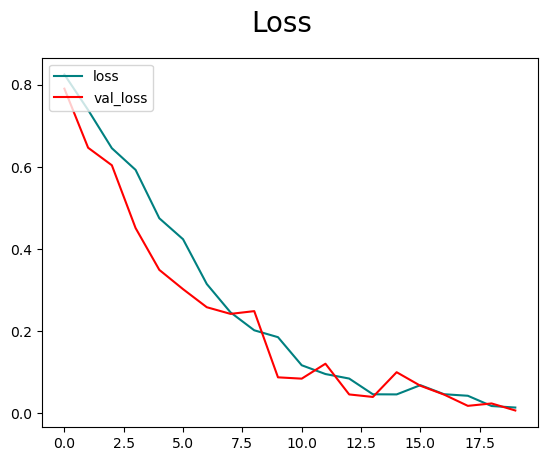

In [41]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

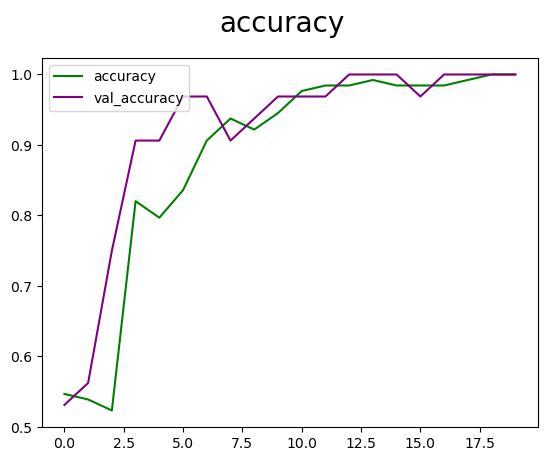

In [42]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='purple', label='val_accuracy')
fig.suptitle('accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Evaluate Performance

### 4.1 Evaluate

In [43]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [44]:
prec = Precision()
re = Recall()
binacc = BinaryAccuracy()

In [45]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    prec.update_state(y, yhat)
    re.update_state(y, yhat)
    binacc.update_state(y, yhat)

2023-12-28 15:07:39.193171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


1/1 [==============================] - 0s 68ms/step


In [46]:
print(f'Precision:{prec.result().numpy()}, Recall:{re.result().numpy()}, BinaryAccuracy:{binacc.result().numpy()}')
# model is perfoming well on this single batch of data

Precision:0.0, Recall:0.0, BinaryAccuracy:1.0


### 4.2 Test

In [47]:
import cv2

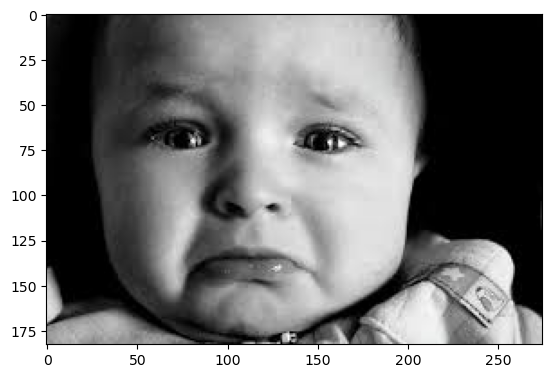

In [48]:
img = cv2.imread('sadtest.jpg')
if img is not None:
    # Convert the image from BGR to RGB and display it
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()
else:
    # Provide an error message
    print(f"Failed to read the image from {image_path}. Please check the file path and permissions.")

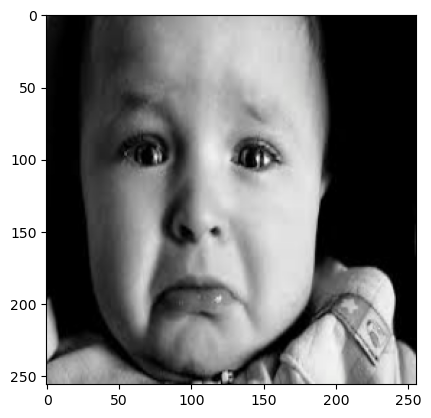

In [49]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [50]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [51]:
yhat

array([[0.8236974]], dtype=float32)

In [52]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad


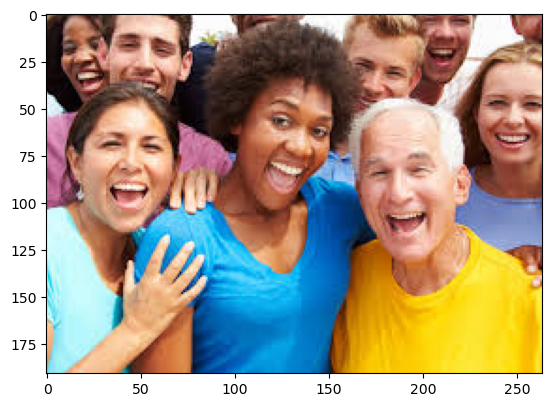

In [53]:
img = cv2.imread('happystest.jpg')
if img is not None:
    # Convert the image from BGR to RGB and display it
    rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(rgb_img)
    plt.show()
else:
    # Provide an error message
    print(f"Failed to read the image from {image_path}. Please check the file path and permissions.")

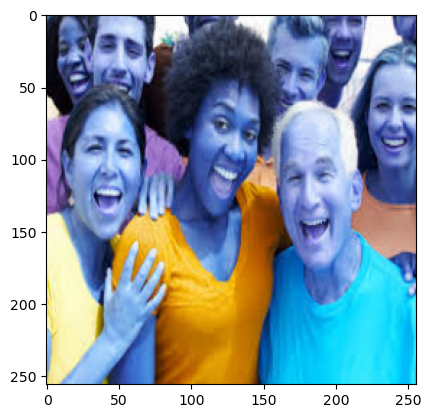

In [54]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [55]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 18ms/step


In [56]:
yhat

array([[0.00226615]], dtype=float32)

In [57]:
if yhat > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


##### The model has successfully predicted the sentiments class in the images

# Save the Model

### 5.1 Save the Model

In [58]:
from tensorflow.keras.models import load_model

In [59]:
model.save(os.path.join('models', 'moodclassifiermodel.h5'))

/Users/luch/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [60]:
# load the model
new_model = load_model(os.path.join('models', 'moodclassifiermodel.h5'))

In [61]:
# checking if model works
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 47ms/step


array([[0.00226615]], dtype=float32)

In [62]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 16ms/step


In [63]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
